In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 5)

# Performance Comparison

In [41]:
dataset = 'synthetic'
train_size = 200
sigma = 0.5
max_features = {
    'synthetic': 256,
}

PATH = "/home/gridsan/shibal/SkinnyTrees/scripts"
RUN = 1

In [42]:
annealing = [True]
criteria = 'auc'
tuning_seeds = [0]
seeds = np.arange(1,26)

for anneal in annealing:
    print("======== Anneal:{}".format(anneal))
    
    result_df = pd.DataFrame()
    for seed in seeds: 
        for tuning_seed in tuning_seeds:
            path = f"{PATH}/logs_trees/skinny_trees/syntheticdata/{dataset}/{sigma}/{max_features[dataset]}/mse/{RUN}.{tuning_seed}/anneal{anneal}/train_size_{train_size}/results/seed{seed}/study-anneal.csv"
            try:
                df_temp = pd.read_csv(path)
                df_temp['seed'] = seed
            except:
                print("Missing:", path)
                continue
            result_df = pd.concat([result_df,df_temp],axis=0)
            result_df.index = np.arange(len(result_df))

======== Anneal:True


In [43]:
result_df

,Unnamed: 0,number,value,datetime_start,datetime_complete,duration,params_batch_size_scaler,params_constant_batch_size,params_constant_learning_rate,params_depth,...,user_attrs_fnr,user_attrs_fpr,user_attrs_mse_test,user_attrs_mse_valid,user_attrs_num_epochs,user_attrs_tnr,user_attrs_tpr,user_attrs_val_loss_history,state,seed
0,0,0,0.315877,2024-09-02 19:01:26.778813,2024-09-02 19:01:58.854560,0 days 00:00:32.075747,2,16,0.060750,2,...,0.0,0.028226,0.362881,0.315877,400,0.971774,1.0,"[7.428797245025635, 5.35869836807251, 4.593649...",COMPLETE,1
1,1,1,2.102162,2024-09-02 19:01:58.861802,2024-09-02 19:02:28.185658,0 days 00:00:29.323856,1,16,0.090623,3,...,0.0,1.000000,3.339424,2.102162,395,0.000000,1.0,"[4.458810329437256, 2.275142192840576, 2.39778...",COMPLETE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12498,498,498,2.989162,2024-09-02 21:40:53.841383,2024-09-02 21:41:12.136289,0 days 00:00:18.294906,5,16,0.002344,2,...,0.0,1.000000,3.846417,2.989162,395,0.000000,1.0,"[6.6486687660217285, 6.637072563171387, 6.6255...",COMPLETE,25
12499,499,499,2.885061,2024-09-02 21:41:12.139229,2024-09-02 21:41:24.373547,0 days 00:00:12.234318,1,16,0.018199,5,...,0.0,1.000000,3.706625,2.885061,50,0.000000,1.0,"[29.479442596435547, 28.01340103149414, 26.664...",COMPLETE,25


In [44]:
# result_df = result_df[result_df['params_depth']<=4]
# result_df = result_df[result_df['user_attrs_feature_sparsity']<=100]

In [45]:
best_ = dict()
for seed, df in result_df.groupby('seed'):
    if len(df) == 0:
        best_[seed] = pd.Series()
        continue
    best_[seed]=df.iloc[df['user_attrs_mse_valid'].argmin()].copy()

In [46]:
best_df = pd.DataFrame(best_).T

In [47]:
metrics = [
    'params_batch_size_scaler', 'params_constant_batch_size',
    'params_constant_learning_rate', 'params_depth', 'params_epochs', 
#     'params_kernel_constraint',
    'params_kernel_l2',
    'params_num_trees',
    'params_temperature',
    'params_use_annealing',
    'user_attrs_feature_sparsity',
    'user_attrs_feature_support',
    'user_attrs_feature_support_truth',
    'user_attrs_fnr', 'user_attrs_fpr',
    'user_attrs_mse_test',
    'user_attrs_mse_valid', 
    'user_attrs_num_epochs', 'user_attrs_tnr',
    'user_attrs_tpr',    
    'user_attrs_f1',    
]
best_df = best_df[metrics]

In [48]:
best_df

,params_batch_size_scaler,params_constant_batch_size,params_constant_learning_rate,params_depth,params_epochs,params_kernel_l2,params_num_trees,params_temperature,params_use_annealing,user_attrs_feature_sparsity,user_attrs_feature_support,user_attrs_feature_support_truth,user_attrs_fnr,user_attrs_fpr,user_attrs_mse_test,user_attrs_mse_valid,user_attrs_num_epochs,user_attrs_tnr,user_attrs_tpr,user_attrs_f1
1,1,16,0.047487,3,280,17.250368,45,0.000863,True,8,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.0,0.262683,0.201856,280,1.0,1.0,1.0
2,4,16,0.035789,2,335,1.789029,16,0.003288,True,11,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.012097,0.291879,0.263706,335,0.987903,1.0,0.842105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,2,16,0.06075,2,400,1.304907,49,0.00506,True,9,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.004032,0.308743,0.344239,400,0.995968,1.0,0.941176
25,2,16,0.070067,3,250,12.962429,15,0.034096,True,8,[False False False False False False False Fal...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,0.0,0.298471,0.160021,250,1.0,1.0,1.0


In [49]:
best_df.columns

Index(['params_batch_size_scaler', 'params_constant_batch_size',
       'params_constant_learning_rate', 'params_depth', 'params_epochs',
       'params_kernel_l2', 'params_num_trees', 'params_temperature',
       'params_use_annealing', 'user_attrs_feature_sparsity',
       'user_attrs_feature_support', 'user_attrs_feature_support_truth',
       'user_attrs_fnr', 'user_attrs_fpr', 'user_attrs_mse_test',
       'user_attrs_mse_valid', 'user_attrs_num_epochs', 'user_attrs_tnr',
       'user_attrs_tpr', 'user_attrs_f1'],
      dtype='object')

In [50]:
best_df.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25],
      dtype='int64')

In [51]:
best_df['params_depth'].values

array([3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 4, 3, 2, 2, 3, 2, 4,
       3, 2, 3], dtype=object)

In [52]:
best_df['user_attrs_mse_test'].mean(), best_df['user_attrs_mse_test'].sem()

(0.2965501053797922, 0.0064898173063194)

In [53]:
best_df['user_attrs_f1'].mean(), best_df['user_attrs_f1'].sem()

(0.945782743303271, 0.023552853770671588)

In [54]:
best_df['user_attrs_feature_sparsity'].mean(), best_df['user_attrs_feature_sparsity'].sem()

(9.32, 0.6873136110975834)

In [17]:
best_df['user_attrs_mse_test'].sort_values().values

array([0.2826161794374245, 0.2902506172840384, 0.2958542004223303,
       0.2973347324947937, 0.3021943608078454, 0.3025831763628264,
       0.3057036180359395, 0.3137305966587723, 0.3222848207059188,
       0.3230424043288123, 0.3233633431218924, 0.3238799467385866,
       0.3279738312505992, 0.3382594849372435, 0.3394149984502744,
       0.3469442617161574, 0.3500925604558429, 0.3536877250497114,
       0.3581168919677435, 0.3845600895202053, 0.3886998024270791,
       0.4005870399931151, 0.4117923354195443, 0.4626539475619072,
       0.4718456650727365], dtype=object)

In [18]:
best_df['user_attrs_feature_sparsity'].mean()

8.68

In [19]:
best_df['user_attrs_feature_sparsity'].values

array([8, 8, 9, 9, 8, 10, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8,
       11, 8, 8, 12], dtype=object)

In [20]:
best_df['user_attrs_num_epochs'].values

array([265, 415, 415, 225, 400, 280, 50, 400, 475, 400, 300, 265, 415,
       280, 295, 415, 440, 440, 250, 50, 170, 440, 280, 415, 400],
      dtype=object)

In [21]:
best_df.columns

Index(['params_batch_size_scaler', 'params_constant_batch_size',
       'params_constant_learning_rate', 'params_depth', 'params_epochs',
       'params_kernel_l2', 'params_num_trees', 'params_temperature',
       'params_use_annealing', 'user_attrs_feature_sparsity',
       'user_attrs_feature_support', 'user_attrs_feature_support_truth',
       'user_attrs_fnr', 'user_attrs_fpr', 'user_attrs_mse_test',
       'user_attrs_mse_valid', 'user_attrs_num_epochs', 'user_attrs_tnr',
       'user_attrs_tpr', 'user_attrs_f1'],
      dtype='object')

In [22]:
best_df['user_attrs_feature_sparsity'].values

array([8, 8, 9, 9, 8, 10, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8,
       11, 8, 8, 12], dtype=object)

In [23]:
best_df['user_attrs_feature_sparsity'].mean(), best_df['user_attrs_feature_sparsity'].sem()

(8.68, 0.22891046284519195)

In [24]:
best_df['params_constant_learning_rate'].mean()

0.06549277814189466

In [25]:
best_df['user_attrs_feature_support_truth']

1     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
                            ...                        
24    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
25    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
Name: user_attrs_feature_support_truth, Length: 25, dtype: object

In [26]:
best_df['user_attrs_feature_support_truth'].str.rsplit(pat='[', n=max_features[dataset], expand=True)

,0,1
1,,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
2,,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
...,...,...
24,,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
25,,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...


In [27]:
best_df['user_attrs_feature_support_truth']

1     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
                            ...                        
24    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
25    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
Name: user_attrs_feature_support_truth, Length: 25, dtype: object

In [28]:
best_df['user_attrs_feature_support_truth'].str.rsplit(pat='[', n=max_features[dataset], expand=True)[1].str.rsplit(pat=']', n=256, expand=True)[0]

1     0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
2     0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
                            ...                        
24    0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
25    0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
Name: 0, Length: 25, dtype: object

In [29]:
feature_support_truth = best_df['user_attrs_feature_support_truth'].str.rsplit(pat='[', n=max_features[dataset], expand=True)[1].str.rsplit(pat=']', n=max_features[dataset], expand=True)[0].str.rsplit(pat='.', n=max_features[dataset], expand=True).iloc[:,:-1]
feature_support_truth = feature_support_truth.astype(int)
feature_support_truth.mean().values.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
feature_support_truth

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
feature_support_recovery = best_df['user_attrs_feature_support'].str.rsplit(pat='[', n=max_features[dataset], expand=True)[1].str.rsplit(pat=']', n=max_features[dataset], expand=True)[0].str.replace('\n','').str.strip()
feature_support_recovery = feature_support_recovery.str.replace("  ",",")
feature_support_recovery = feature_support_recovery.str.replace(" ",",")
feature_support_recovery = feature_support_recovery.str.rsplit(pat=',', n=max_features[dataset], expand=True)
str2bool = {'True': 1, 'False': 0}
for col in feature_support_recovery.columns:
    feature_support_recovery[col] = feature_support_recovery[col].map(str2bool)


In [32]:
(feature_support_recovery.mean().values>0.5).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
feature_support_truth.mean().values.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
feature_support_recovery.mean().values[feature_support_truth.mean().values.astype(bool)]

array([1., 1., 1., 1., 1., 1., 1., 1.])

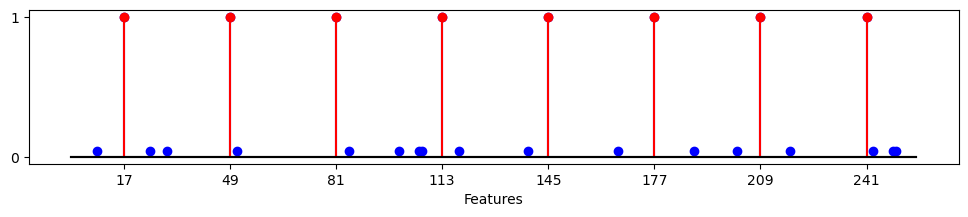

In [35]:
feature_support_recovery_median = feature_support_recovery.mean().values
feature_support_recovery_median[feature_support_recovery_median==0] = np.nan

feature_support_truth_median = feature_support_truth.mean().values
feature_support_truth_median[feature_support_truth_median==0] = np.nan

plt.figure(figsize=(12,2))
plt.stem(np.arange(1, max_features[dataset]+1), feature_support_recovery_median, markerfmt='b', linefmt='b', basefmt='k')


feature_support_truth_median = feature_support_truth.mean().values
feature_support_recovery_median = feature_support_recovery.mean().values
feature_support_recovery_median[feature_support_truth_median==0] = np.nan
font = {'size': 20}

plt.rc('font', **font)
plt.stem(np.arange(1, max_features[dataset]+1), feature_support_recovery_median, markerfmt='r', linefmt='r', basefmt='k')
plt.xticks(np.where(feature_support_truth.mean().values.astype(bool))[0]+1)
plt.yticks([0,1])
plt.xlabel("Features")
plt.savefig(f"./Figures/features_selected_sigma{sigma}_p_{max_features[dataset]}_train_size{train_size}.pdf", bbox_inches='tight')
plt.show()


In [36]:
np.where(feature_support_truth.mean().values.astype(bool))[0]

array([ 16,  48,  80, 112, 144, 176, 208, 240])

In [37]:
feature_support_truth.mean().values.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
feature_support_recovery.mean().values[~(feature_support_truth.mean().values.astype(bool))].mean()

0.0027419354838709676

In [12]:
# sparse_df = result_df[result_df['user_attrs_feature_sparsity']<=100]

In [39]:
# plt.scatter(sparse_df['params_depth'], sparse_df['user_attrs_feature_sparsity'])

In [40]:
# sparse_df['user_attrs_num_epochs'].sort_values().values[-1000:]